<a href="https://colab.research.google.com/github/zahra-atf/Physical-Activity-Recognition-PySpark/blob/main/PAMAP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PAMAP2 Physical Activity Monitoring Data Set** 

Dataset: https://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring

### **Data Set Information:**

The PAMAP2 Physical Activity Monitoring dataset contains data of 18 different physical activities (such as walking, cycling, playing soccer, etc.), performed by 9 subjects wearing 3 inertial measurement units and a heart rate monitor. The dataset can be used for activity recognition and intensity estimation, while developing and applying algorithms of data processing, segmentation, feature extraction and classification.

**Sensors**

3 Colibri wireless inertial measurement units (IMU):
- sampling frequency: 100Hz

- position of the sensors:

- 1 IMU over the wrist on the dominant arm
- 1 IMU on the chest
- 1 IMU on the dominant side's ankle

HR-monitor:

- sampling frequency: ~9Hz

### **Attribute Information:**

The 54 columns in the data files are organized as follows:
1. timestamp (s)
2. activityID (see below for the mapping to the activities)
3. heart rate (bpm)
4-20. IMU hand
21-37. IMU chest
38-54. IMU ankle

The IMU sensory data contains the following columns:

1. temperature (Â°C)

2-4. 3D-acceleration data (ms-2), scale: Â±16g, resolution: 13-bit

5-7. 3D-acceleration data (ms-2), scale: Â±6g, resolution: 13-bit

8-10. 3D-gyroscope data (rad/s)

11-13. 3D-magnetometer data (Î¼T)

14-17. orientation (invalid in this data collection)

**List of activityIDs and corresponding activities:**

1 lying

2 sitting

3 standing

4 walking

5 running

6 cycling

7 Nordic walking

9 watching TV

10 computer work

11 car driving

12 ascending stairs

13 descending stairs

16 vacuum cleaning

17 ironing

18 folding laundry

19 house cleaning

20 playing soccer

24 rope jumping

0 other (transient activities)

### ***Download Dataset***

In [ ]:
import zipfile
import numpy as np
import pandas as pd

In [ ]:
!gdown "https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip"

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip
To: /content/PAMAP2_Dataset.zip
100% 688M/688M [00:15<00:00, 43.1MB/s]


In [ ]:
archive = zipfile.ZipFile('/content/PAMAP2_Dataset.zip')
for file in archive.namelist():
     archive.extract(file, )

### ***Pyspark Installation***

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 57.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=8ce6cf861d073376312ad1b40b91edf4f2a0d084c961b0804b38b2f937c64df2
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


### ***Build new Spark session***

In [ ]:
import pyspark as ps
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DataFrame").getOrCreate()
spark

### ***Create Spark dataframe***

In [ ]:
df = spark.read.csv("PAMAP2_Dataset/Protocol/subject101.dat", sep = " ", header =False, inferSchema=True)

for i in range(2,10):
  df = df.union(spark.read.csv(f"PAMAP2_Dataset/Protocol/subject10{i}.dat", sep = " ", header =False, inferSchema=True))

print(f"Rows: {df.count()}, Columns: {len(df.columns)}")

Rows: 2872533, Columns: 54


In [ ]:
# Print head of dataframe
df.show()

+----+---+-----+----+-------+-------+-------+-------+-------+-------+----------+----------+-----------+-------+--------+--------+----+----+----+----+-------+--------+-------+--------+--------+-------+--------+-----------+-----------+-----------+-----------+--------+-------+----+----+----+----+-------+-------+--------+----------+-------+--------+--------+-----------+-----------+-----------+--------+--------+--------+----+----+----+----+
| _c0|_c1|  _c2| _c3|    _c4|    _c5|    _c6|    _c7|    _c8|    _c9|      _c10|      _c11|       _c12|   _c13|    _c14|    _c15|_c16|_c17|_c18|_c19|   _c20|    _c21|   _c22|    _c23|    _c24|   _c25|    _c26|       _c27|       _c28|       _c29|       _c30|    _c31|   _c32|_c33|_c34|_c35|_c36|   _c37|   _c38|    _c39|      _c40|   _c41|    _c42|    _c43|       _c44|       _c45|       _c46|    _c47|    _c48|    _c49|_c50|_c51|_c52|_c53|
+----+---+-----+----+-------+-------+-------+-------+-------+-------+----------+----------+-----------+-------+--------+

In [ ]:
# Print schema of features
df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: double (nullable = true)
 |-- _c18: double (nullable = true)
 |-- _c19: double (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: double (nullable = true)
 |-- _c23: double (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: double (nullable = tr

### ***Delete transient activity***

In [ ]:
# Remove samples that their activity_id is 0
df = df.filter(df._c1!=0)
print(f"Rows: {df.count()}, Columns: {len(df.columns)}")

Rows: 1942872, Columns: 54


### ***Check number of each target class***

In [ ]:
df.groupBy().pivot("_c1").count().show()

+------+------+------+------+-----+------+------+------+------+------+------+-----+
|     1|     2|     3|     4|    5|     6|     7|    12|    13|    16|    17|   24|
+------+------+------+------+-----+------+------+------+------+------+------+-----+
|192523|185188|189931|238761|98199|164600|188107|117216|104944|175353|238690|49360|
+------+------+------+------+-----+------+------+------+------+------+------+-----+



According to above output, whereas we have 18 target classes, but in this dataset, there are just 12 classes.

### ***Check For missing values***

In [ ]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

# Check the number of missing values
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+-------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|_c1|    _c2|  _c3|  _c4|  _c5|  _c6|  _c7|  _c8|  _c9| _c10| _c11| _c12| _c13| _c14| _c15| _c16| _c17| _c18| _c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|
+---+---+-------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  0|  0|1765464|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|11124|2420|2420|2

As is clear, approximately 91% of feature _c2 (hearrate) is NaN. So, we must drop this feature. In addition, timestamp is not a useful feature.

In [ ]:
# Delete "timestamp" and "heartrate" feature
df = df.drop("_c2", "_c0")

### ***Drop missing values***

In [ ]:
df = df.na.drop()
print(f"Rows: {df.count()}, Columns: {len(df.columns)}")

Rows: 1921431, Columns: 52


### ***Shuffle DataFrame***

In [ ]:
from pyspark.sql.functions import rand 

df = df.orderBy(rand())

### ***Create a sub sample of dataset***


In [ ]:
# Select sub sample for train because of less memory
df = df.sample(0.2, 123)
print(f"Train Sub sample:\nRows: {df.count()}, Columns: {len(df.columns)}")

Train Sub sample:
Rows: 383271, Columns: 52


### ***Check for outliers***

In [ ]:
# Transform spark dataframe into a pandas dataframe
pdf = df.toPandas()

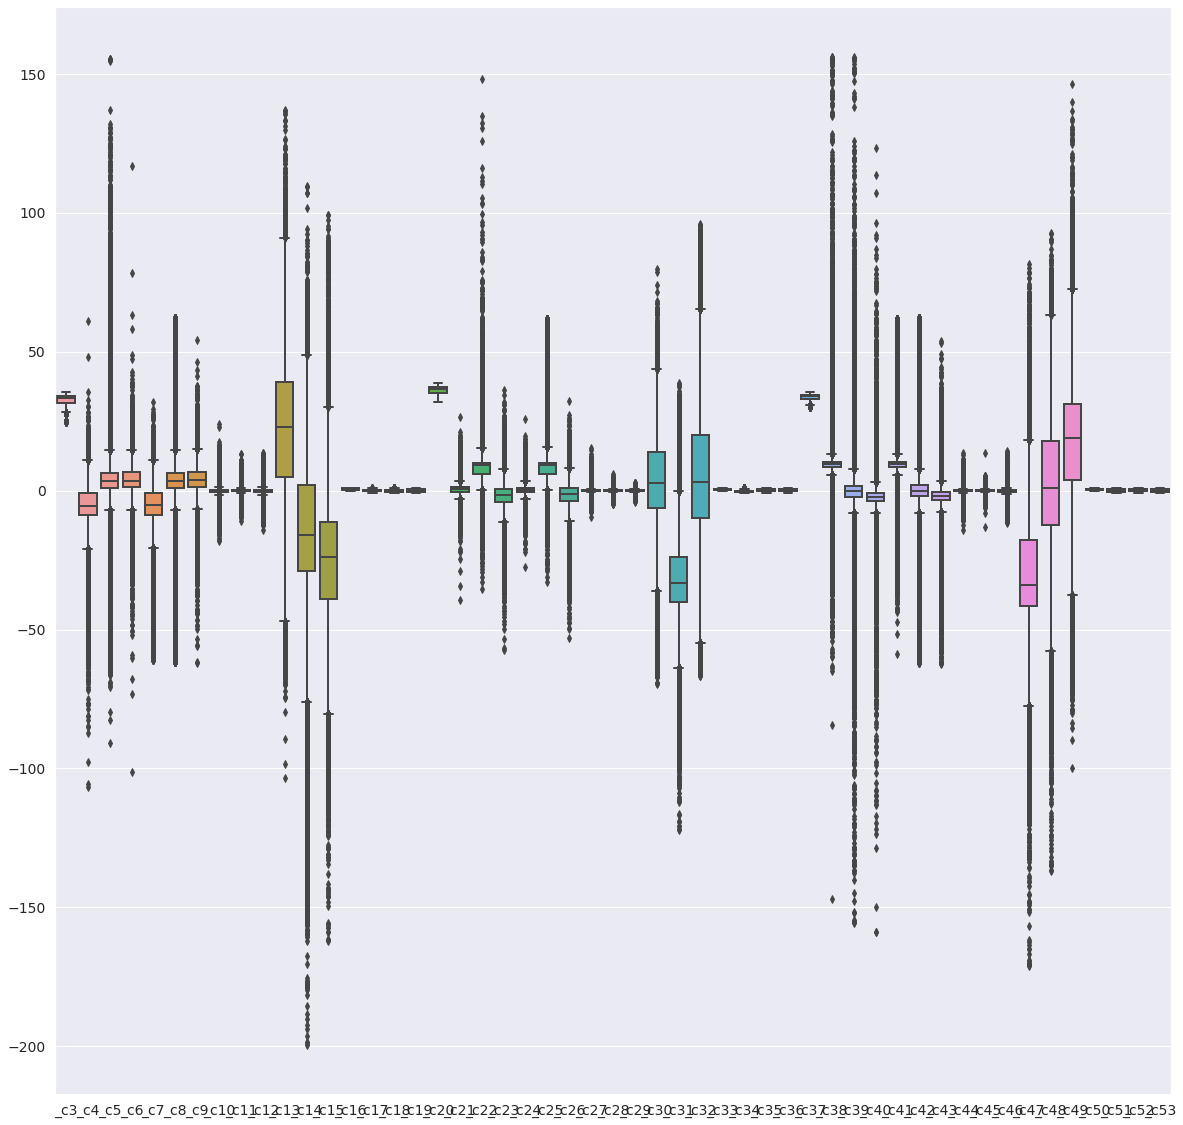

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting configuration
sns.set_style("darkgrid")
sns.set_context("notebook", rc={"lines.linewidth": 2, 
                                "xtick.labelsize":14, 
                                "ytick.labelsize":14,
                                "axes.labelsize": 18
                                })

fig, ax = plt.subplots(figsize=(20,20))
# Drop "activityID" from outlier plot
Features = pdf.drop(['_c1'], axis = 1)
sns.boxplot(data = Features)

### ***Description of features***

In [ ]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c1,383848,8.08559898709906,6.17232807663259,1,24
_c3,383848,32.76025519867239,1.789629273508918,24.875,35.5
_c4,383848,-4.913963930668761,6.213956947208209,-106.957,47.9715
_c5,383848,3.5830390935455325,6.897116925325064,-82.5509,155.526
_c6,383848,3.619592113163742,3.9560707651399234,-72.1902,85.7824
_c7,383848,-4.84741949324183,6.2270815097737415,-61.1292,29.3509
_c8,383848,3.5692400594735996,6.577370311227668,-61.8417,62.2524
_c9,383848,3.8044738368782607,3.940328310931926,-58.9296,50.8425
_c10,383848,-6.274181843549332E-4,1.3293938888164256,-18.0416,21.6405


### ***Plot distribution of features***

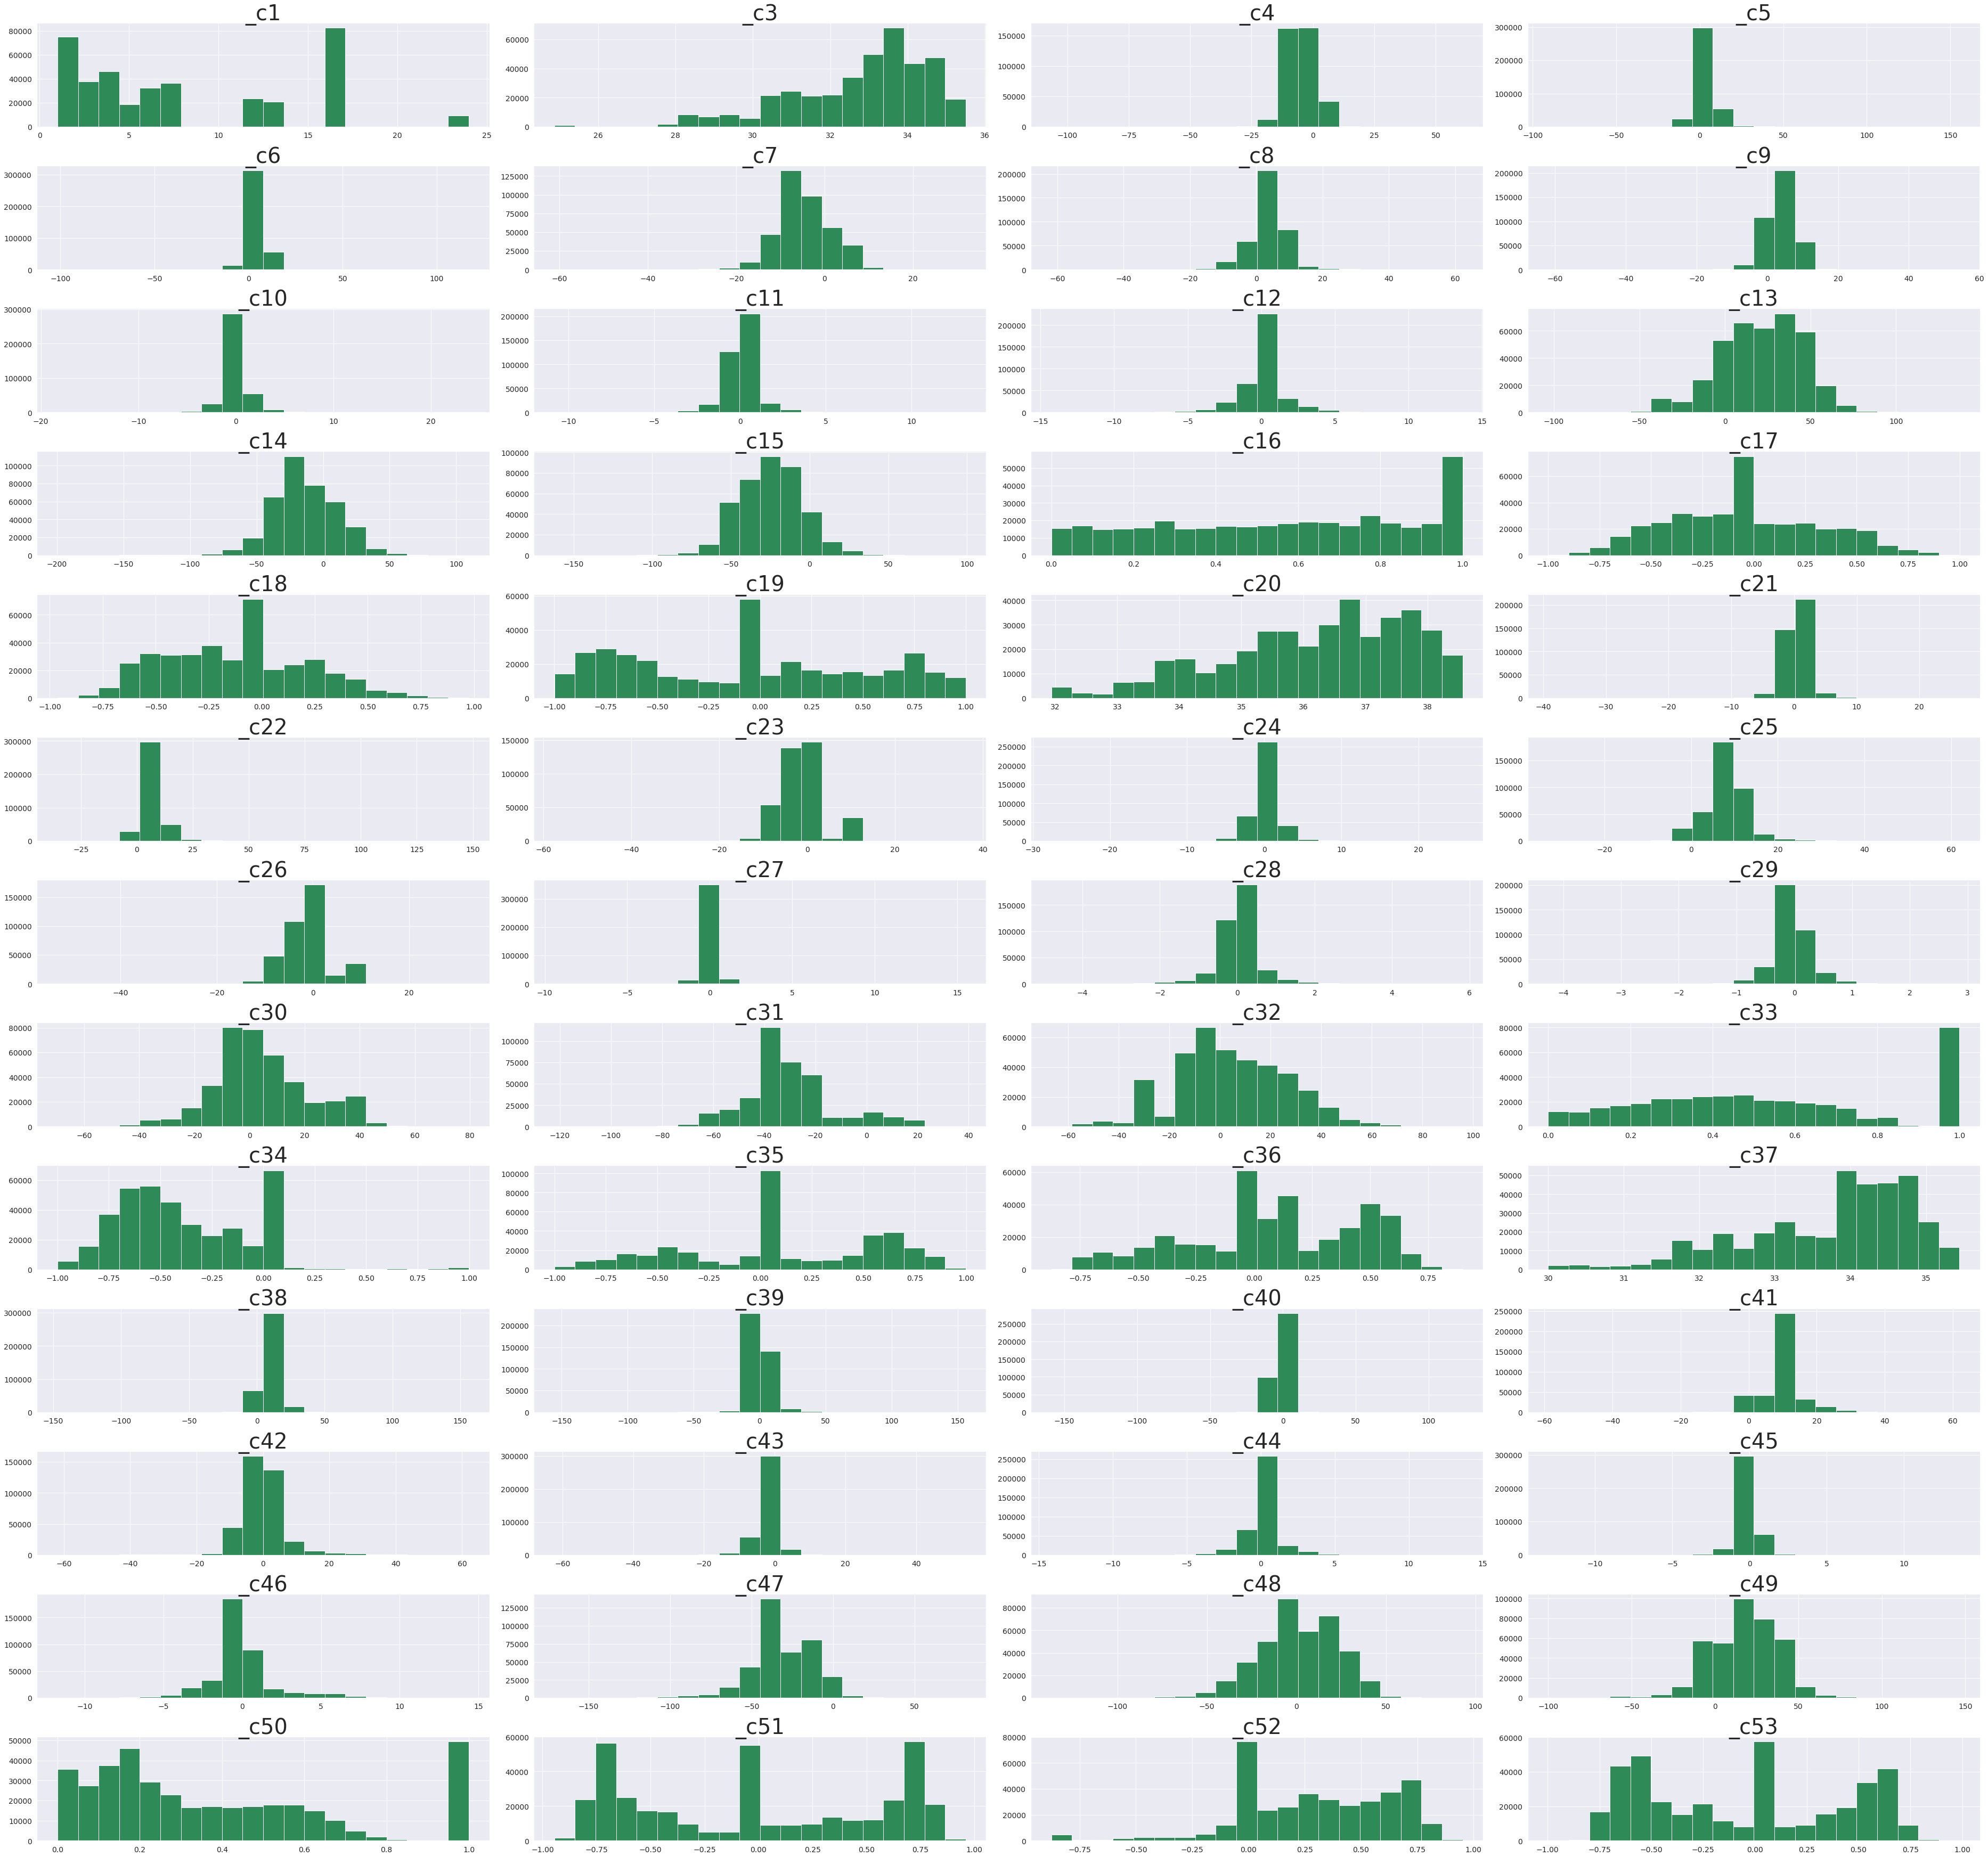

In [ ]:
fig=plt.figure(figsize=(52,52))
for index, column in enumerate(pdf.columns):
    ax=fig.add_subplot(14,4,index+1)
    pdf[column].hist(bins=20,ax=ax,facecolor='SeaGreen')
    ax.set_title(column , fontsize = 40)
          
fig.tight_layout()  
plt.show()

### ***Correlation***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


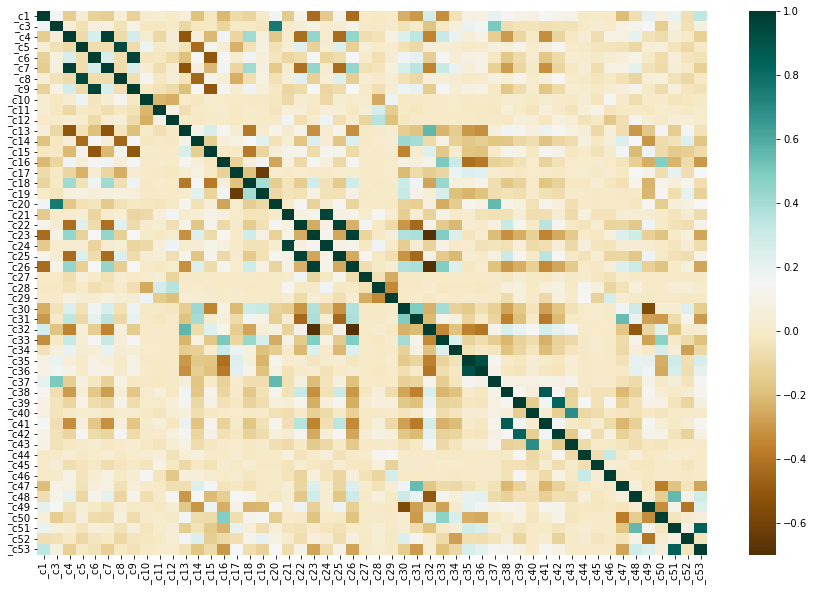

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = pdf.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

### ***Balancing of classes***

17    47757
4     46076
1     38499
3     37630
2     36876
7     36697
16    34905
6     32652
12    23432
13    20928
5     18837
24     9568
Name: _c1, dtype: int64


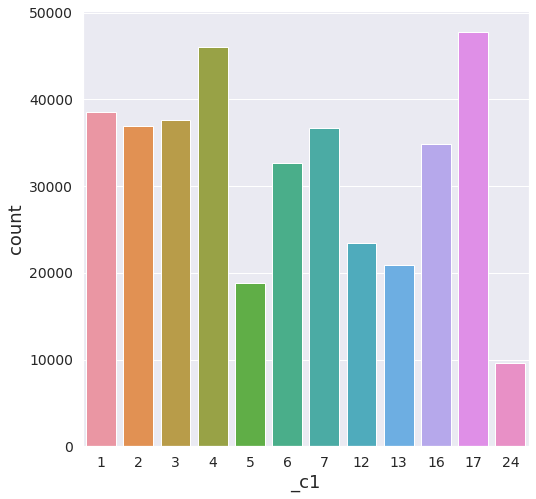

In [ ]:
# Check balance of the "activityID" column
fig, ax = plt.subplots(figsize=(8, 8))
# Count and sum number of each "activityID"
print(pdf._c1.value_counts())
# Plot the distribution
sns.countplot(x='_c1',data = pdf)

### ***Train and Test Split***

In [ ]:
# Split train and test samples randomly (70% train and 30% test)
train_df, test_df =df.randomSplit([0.7, 0.3], seed=42)

print("Training set has {:d} samples".format(train_df.count()))
print("Test set size has {:d} samples".format(test_df.count()))

Training set has 269201 samples
Test set size has 114692 samples


### ***Decision Tree***

In [ ]:
from pyspark.ml.feature import StringIndexer,VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Define pipeline for Classifiacation tree with hyperparameter tuning
def decision_tree_pipeline(train_data, features, output, k_fold= 5):

    # Indexing the target column and rename it as "label"
    label_indexer = StringIndexer(inputCol = output, outputCol = "label")
    
    # Assemble all the features into a single vector
    assembler = VectorAssembler(inputCols = features, outputCol = "features")

    # Create the decision tree transformer
    dt = DecisionTreeClassifier(featuresCol = "features", labelCol = "label", seed = 20)

    # Set up the pipeline
    pipeline = Pipeline(stages =[label_indexer] + [assembler] + [dt])

    # ParamGridBuilder is used to construct a grid of parameters to search over.
    # Hyperparameters : dt.maxDepth and dt.impurity
    # This grid will have 10 parameter settings for CrossValidator to choose from.
    param_grid = ParamGridBuilder()\
    .addGrid(dt.maxDepth, [5, 10, 12, 15, 20]) \
    .addGrid(dt.impurity, ["gini", "entropy"]) \
    .build()

    cross_val = CrossValidator(estimator = pipeline, estimatorParamMaps = param_grid,
                               evaluator = MulticlassClassificationEvaluator(metricName = "accuracy"),
                               numFolds = k_fold,
                               collectSubModels = False
                               )
    dt_cv_model = cross_val.fit(train_data)

    return dt_cv_model

In [ ]:
Features=train_df.columns[1:]
output = train_df.columns[0]

### ***Decision Tree on Train set***

In [ ]:
dt_cv_model = decision_tree_pipeline(train_df, Features, output)

In [ ]:
for i, avg_accuracy in enumerate(dt_cv_model.avgMetrics):
    print("Avg. accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. accuracy computed across k-fold cross validation for model setting #1: 0.58
Avg. accuracy computed across k-fold cross validation for model setting #2: 0.62
Avg. accuracy computed across k-fold cross validation for model setting #3: 0.84
Avg. accuracy computed across k-fold cross validation for model setting #4: 0.86
Avg. accuracy computed across k-fold cross validation for model setting #5: 0.91
Avg. accuracy computed across k-fold cross validation for model setting #6: 0.93
Avg. accuracy computed across k-fold cross validation for model setting #7: 0.96
Avg. accuracy computed across k-fold cross validation for model setting #8: 0.98
Avg. accuracy computed across k-fold cross validation for model setting #9: 0.98
Avg. accuracy computed across k-fold cross validation for model setting #10: 0.99


In [ ]:
print("Best model according to k-fold cross validation: maxDepth = ",dt_cv_model.bestModel.stages[-1].getMaxDepth(),
      ", Impurity = ",dt_cv_model.bestModel.stages[-1].getImpurity())
print(dt_cv_model.bestModel.stages[-1])

Best model according to k-fold cross validation: maxDepth =  20 , Impurity =  entropy
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b9f0071ba900, depth=20, numNodes=4409, numClasses=12, numFeatures=51


### ***Decision Tree on Test set***

In [ ]:
# Make predictions on the test set
dt_predictions = dt_cv_model.transform(test_df)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate_model_dt(prediction):

  Acc_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
  f1_evaluator = MulticlassClassificationEvaluator(metricName="weightedFMeasure")
  Recall_evaluator = MulticlassClassificationEvaluator(metricName="weightedRecall")
  Precision_evaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")

  print("Accuracy is: ", Acc_evaluator.evaluate(prediction))
  print("Weighted Fscore is: ", f1_evaluator.evaluate(prediction))
  print("Weighted Recall is: ", Recall_evaluator.evaluate(prediction))
  print("Weighted Precision is: ", Precision_evaluator.evaluate(prediction))
  print("Accuracy is: #{:.2f}".format(avg_accuracy))

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics

evaluate_model_dt(dt_predictions)

Accuracy is:  0.9931619160590308
Weighted Fscore is:  0.9934847850403529
Weighted Recall is:  0.9933375772849757
Weighted Precision is:  0.993438193009363


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate_model_dt(prediction):

  Acc_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
  f1_evaluator = MulticlassClassificationEvaluator(metricName="weightedFMeasure")
  Recall_evaluator = MulticlassClassificationEvaluator(metricName="weightedRecall")
  Precision_evaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")

  print("Accuracy is: #{:.2f}".format(Acc_evaluator.evaluate(prediction)))
  print("Accuracy is: #{:.2f}".format(f1_evaluator.evaluate(prediction)))
  print("Accuracy is: #{:.2f}".format(Recall_evaluator.evaluate(prediction)))
  print("Accuracy is: #{:.2f}".format(Precision_evaluator.evaluate(prediction)))

In [ ]:
evaluate_model_dt(dt_predictions)

### ***Confusion matrix - DT***

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


Text(0.5, 1.0, 'Confusion matrix Decision Tree\n')

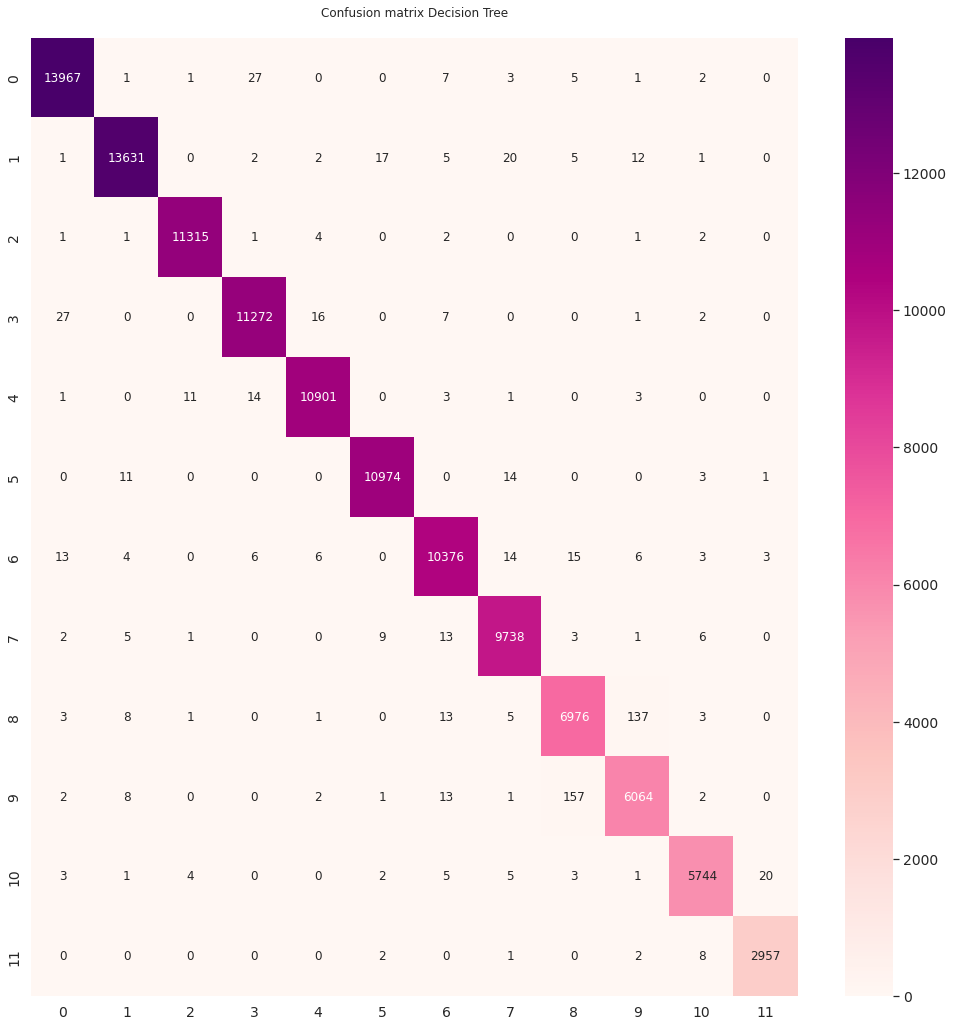

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import confusion_matrix

# Select prediction and label columns
preds_and_labels = dt_predictions.select(['prediction','label'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(metrics.confusionMatrix().toArray(), annot=True, cmap ="RdPu", fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n')

### ***Feature importance - DT***

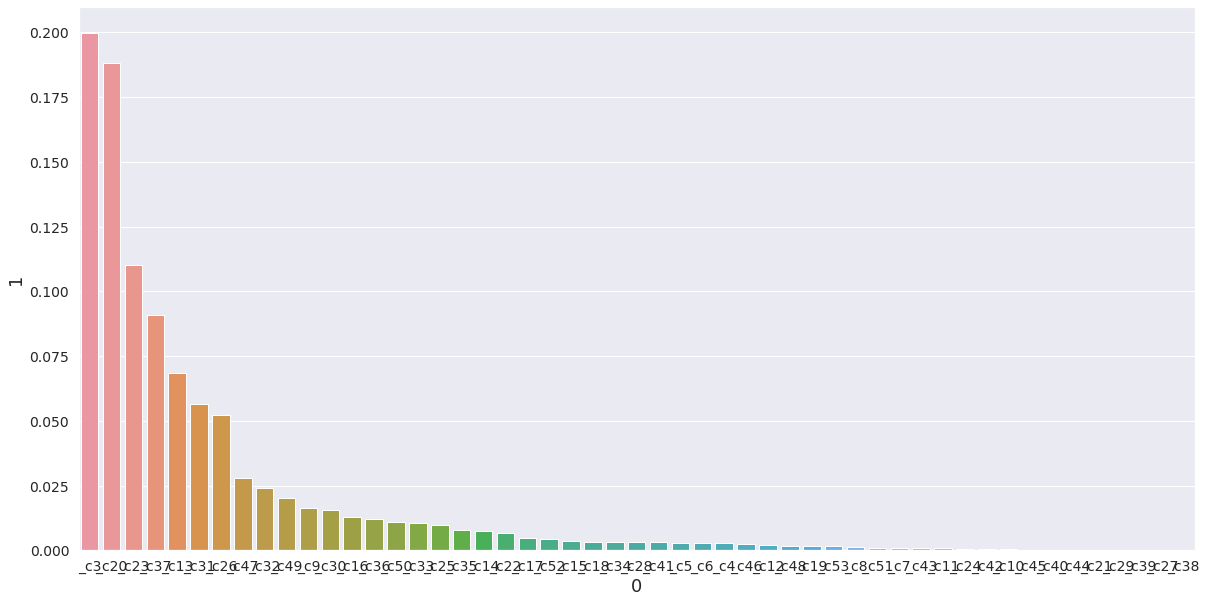

In [ ]:
import pandas as pd

# Feature importance
best_tree = dt_cv_model.bestModel.stages[-1]
va = dt_cv_model.bestModel.stages[-2] 
Feature_importance = pd.DataFrame(list(zip(va.getInputCols(), best_tree.featureImportances)))
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=0, y=1, data=Feature_importance.sort_values(by=1, ascending= False))

### ***Decision Tree with important features***

I decided to check again DT with just important features not all features.

In [ ]:
# Select importanct features
important_features=["_c3","_c20","_c23","_c37","_c13","_c31","_c26"]
dt_cv_model_important = decision_tree_pipeline(train_df, important_features, output)

In [ ]:
for i, avg_accuracy in enumerate(dt_cv_model_important.avgMetrics):
    print("Avg. accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. accuracy computed across k-fold cross validation for model setting #1: 0.58
Avg. accuracy computed across k-fold cross validation for model setting #2: 0.60
Avg. accuracy computed across k-fold cross validation for model setting #3: 0.85
Avg. accuracy computed across k-fold cross validation for model setting #4: 0.88
Avg. accuracy computed across k-fold cross validation for model setting #5: 0.92
Avg. accuracy computed across k-fold cross validation for model setting #6: 0.95
Avg. accuracy computed across k-fold cross validation for model setting #7: 0.97
Avg. accuracy computed across k-fold cross validation for model setting #8: 0.98
Avg. accuracy computed across k-fold cross validation for model setting #9: 0.99
Avg. accuracy computed across k-fold cross validation for model setting #10: 0.99


### ***Logistic Regression***

In [ ]:
from pyspark.ml.feature import StringIndexer,VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Define pipeline for Classifiacation tree with hyperparameter tuning
def Logestic_Regression_pipeline(train_data, features, output, k_fold= 5):

    # Indexing the target column and rename it as "label"
    label_indexer = StringIndexer(inputCol = output, outputCol = "label")
    
    # Assemble all the features into a single vector
    assembler = VectorAssembler(inputCols = features, outputCol = "features")

    # Create the decision tree transformer
    lr = LogisticRegression(featuresCol = 'features', labelCol = 'label')

    # Set up the pipeline
    pipeline = Pipeline(stages =[label_indexer] + [assembler] + [lr])

    # ParamGridBuilder is used to construct a grid of parameters to search over.
    # Hyperparameter : regParam, elasticNetParam and maxIter
    # This grid will have 3 parameter settings for CrossValidator to choose from.

    # Ridge regression when elasticNetParam = 0 and Lasso regression when elasticNetParam = 1.
    param_grid = ParamGridBuilder()\
    .addGrid(lr.maxIter, [10, 15, 20]) \
    .build()
      
    # A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
    cross_val = CrossValidator(estimator = pipeline, 
                               estimatorParamMaps = param_grid,
                               evaluator = MulticlassClassificationEvaluator(metricName = "accuracy"),
                               numFolds = k_fold,
                               collectSubModels = False
                               )
    # Fit the train data
    lr_cv_model = cross_val.fit(train_data)

    return lr_cv_model

In [ ]:
Features = train_df.columns[1:]
output = train_df.columns[0]

### ***Logistic Regression on Train set***

In [ ]:
lr_cv_model = Logestic_Regression_pipeline(train_df, Features, output)

In [ ]:
for i, avg_accuracy in enumerate(lr_cv_model.avgMetrics):
    print("Avgerage accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avgerage accuracy computed across k-fold cross validation for model setting #1: 0.77
Avgerage accuracy computed across k-fold cross validation for model setting #2: 0.78
Avgerage accuracy computed across k-fold cross validation for model setting #3: 0.80


In [ ]:
print(" Best model according to k-fold cross validation: MaxIter = ",lr_cv_model.bestModel.stages[-1]._java_obj.getMaxIter())
print(lr_cv_model.bestModel.stages[-1])

 Best model according to k-fold cross validation: MaxIter =  20
LogisticRegressionModel: uid=LogisticRegression_cdadf6745a03, numClasses=12, numFeatures=51


### ***Logistic Regression on Test set***

In [ ]:
# Make predictions on the test set 
lr_predictions = lr_cv_model.transform(test_df)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate_model(prediction):

  Acc_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
  f1_evaluator = MulticlassClassificationEvaluator(metricName="weightedFMeasure")
  Recall_evaluator = MulticlassClassificationEvaluator(metricName="weightedRecall")
  Precision_evaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")

  print("Accuracy is: ", round(Acc_evaluator.evaluate(prediction),2))
  print("Weighted Fscore is: ", round(f1_evaluator.evaluate(prediction),2))
  print("Weighted Recall is: ", round(Recall_evaluator.evaluate(prediction),2))
  print("Weighted Precision is: ", round(Precision_evaluator.evaluate(prediction),2))

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics

evaluate_model(lr_predictions)

Accuracy is:  0.79
Weighted Fscore is:  0.79
Weighted Recall is:  0.79
Weighted Precision is:  0.79


### ***Confusin Matrix - Logistic Regression***

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


Text(0.5, 1.0, 'Confusion matrix Logestic Regression\n')

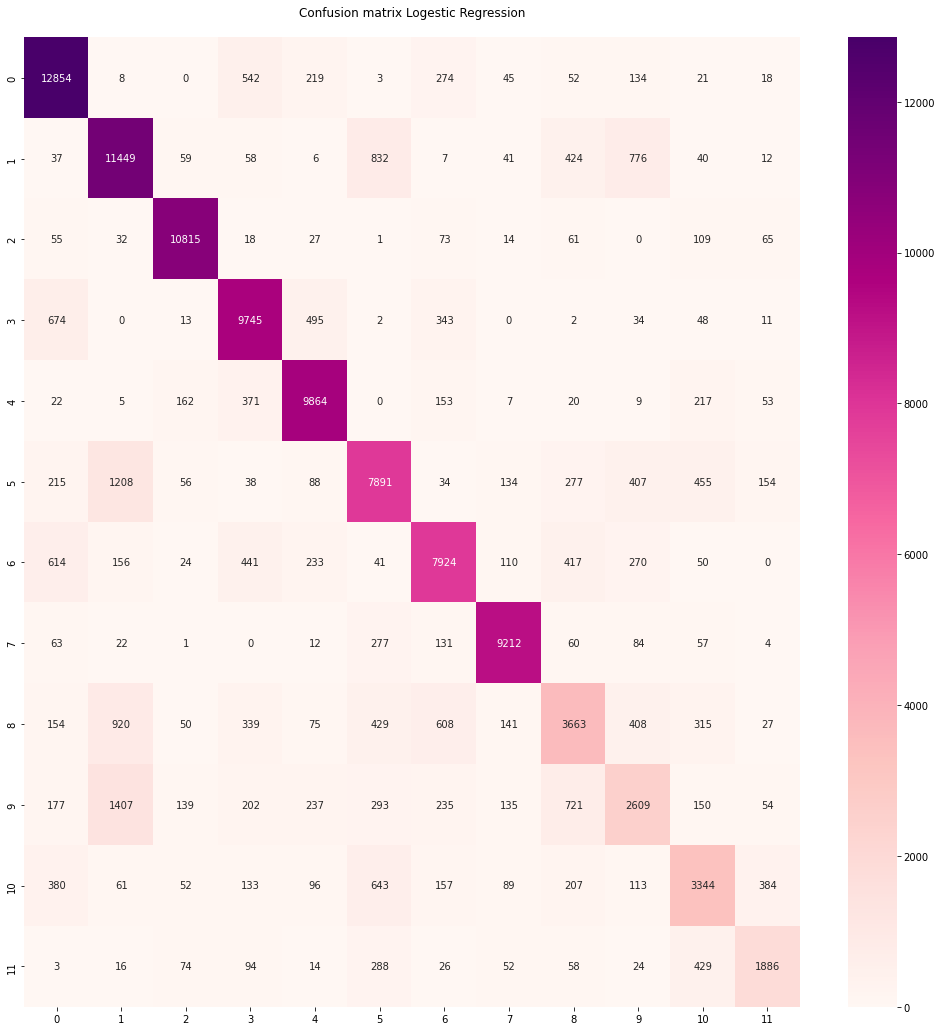

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics

# Select only prediction and label columns
preds_and_labels = lr_predictions.select(['prediction','label'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(metrics.confusionMatrix().toArray(), annot=True, cmap ="RdPu", fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logestic Regression\n')

### ***Random Forest***

In [ ]:
from pyspark.ml.feature import StringIndexer,VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Define pipeline for Random Forest with hyperparameter tuning
def random_forest_pipeline(train_data, features, output, k_fold= 3):

    # Indexing the target column and rename it as "label"
  
    label_indexer = StringIndexer(inputCol = output, outputCol = "label")
    
    # Assemble all the features into a single vector
    assembler = VectorAssembler(inputCols = features, outputCol="features") 

    # Create the random forest transformer
    rf = RandomForestClassifier(featuresCol = "features", labelCol = "label", impurity = "entropy", seed = 42)

    # Set up the pipeline
    pipeline = Pipeline(stages=[label_indexer] + [assembler] + [rf])

    # ParamGridBuilder is used to construct a grid of parameters to search over.
    # Hyperparameter : rf.maxDepth and rf.numTrees
    # this grid will have 6 parameter settings for CrossValidator to choose from.
    param_grid = ParamGridBuilder()\
    .addGrid(rf.maxDepth, [5, 12]) \
    .addGrid(rf.numTrees, [5, 10, 15]) \
    .build()

    # A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
    cross_val = CrossValidator(estimator = pipeline, 
                               estimatorParamMaps = param_grid,
                               evaluator = MulticlassClassificationEvaluator(metricName="accuracy"),
                               numFolds = k_fold,
                               collectSubModels = False
                               )

    # Run cross-validation, and choose the best set of parameters.
    rf_cv_model = cross_val.fit(train_data)

    return rf_cv_model

### ***Random Forest on Train set***

In [ ]:
rf_cv_model = random_forest_pipeline(train_df, Features, output)

In [ ]:
for i, avg_accuracy in enumerate(rf_cv_model.avgMetrics):
    print("Avgerage accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avgerage accuracy computed across k-fold cross validation for model setting #1: 0.69
Avgerage accuracy computed across k-fold cross validation for model setting #2: 0.71
Avgerage accuracy computed across k-fold cross validation for model setting #3: 0.72
Avgerage accuracy computed across k-fold cross validation for model setting #4: 0.95
Avgerage accuracy computed across k-fold cross validation for model setting #5: 0.97
Avgerage accuracy computed across k-fold cross validation for model setting #6: 0.97


In [ ]:
print(" Best model according to k-fold cross validation: maxDepth = ",rf_cv_model.bestModel.stages[-1]._java_obj.getMaxDepth(),
      ", numTrees = ", rf_cv_model.bestModel.stages[-1]._java_obj.getNumTrees())

print(rf_cv_model.bestModel.stages[-1])

 Best model according to k-fold cross validation: maxDepth =  12 , numTrees =  15
RandomForestClassificationModel: uid=RandomForestClassifier_6ff5d39b705b, numTrees=15, numClasses=12, numFeatures=51


### ***Random Forest on Test set***

In [ ]:
# Make predictions on the test set 
rf_predictions = rf_cv_model.transform(test_df)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate_model(prediction):

  Acc_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
  f1_evaluator = MulticlassClassificationEvaluator(metricName="weightedFMeasure")
  Recall_evaluator = MulticlassClassificationEvaluator(metricName="weightedRecall")
  Precision_evaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")

  print("Accuracy is: ", round(Acc_evaluator.evaluate(prediction),2))
  print("Weighted Fscore is: ", round(f1_evaluator.evaluate(prediction),2))
  print("Weighted Recall is: ", round(Recall_evaluator.evaluate(prediction),2))
  print("Weighted Precision is: ", round(Precision_evaluator.evaluate(prediction),2))

In [ ]:
print("Evalution metrics for best model feeding with Test Set")
evaluate_model(rf_predictions)

Evalution metrics for best model feeding with Test Set
Accuracy is:  0.97
Weighted Fscore is:  0.97
Weighted Recall is:  0.97
Weighted Precision is:  0.97


I expected that RF had better accuracy than DT. But it did not occured. So, I decided to check RF without hyperparameter tuning to know whether its accuracy will be better than DT or not. 

### ***RF - without hyperparameter tuning***

In [ ]:
label_indexer = StringIndexer(inputCol = output, outputCol = "label")   
assembler = VectorAssembler(inputCols = Features, outputCol="features")
rf = RandomForestClassifier(featuresCol = "features", labelCol = "label", impurity = "entropy", numTrees = 10, maxDepth = 20, seed = 42)
pipeline = Pipeline(stages=[label_indexer] + [assembler]+ [rf])
transformer = pipeline.fit(train_df)
transformed_data = transformer.transform(train_df)

In [ ]:
best_rf_predictions = transformer.transform(test_df)
print("Evalution metrics for RF with maxDepth = 20, numTrees= 10 feeding with Test Set")
evaluate_model(best_rf_predictions)

Evalution metrics for RF with maxDepth = 20, numTrees= 10 feeding with Test Set
Accuracy is:  1.0
Weighted Fscore is:  1.0
Weighted Recall is:  1.0
Weighted Precision is:  1.0


### ***Confusion Matrix - RF***

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


Text(0.5, 1.0, 'Confusion matrix Random Forest\n')

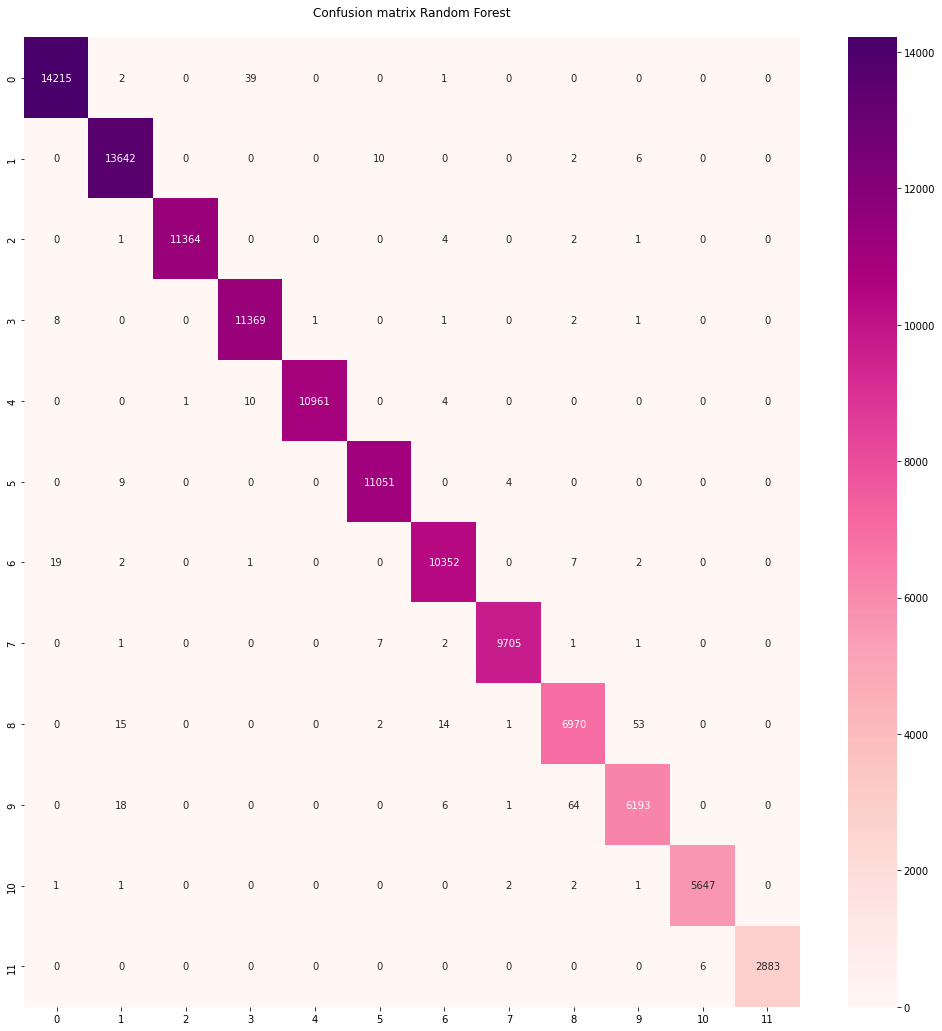

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import confusion_matrix

# Select prediction and label columns
preds_and_labels = best_rf_predictions.select(['prediction','label'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(metrics.confusionMatrix().toArray(), annot=True, cmap ="RdPu", fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Random Forest\n')

### ***Plot Outliers***

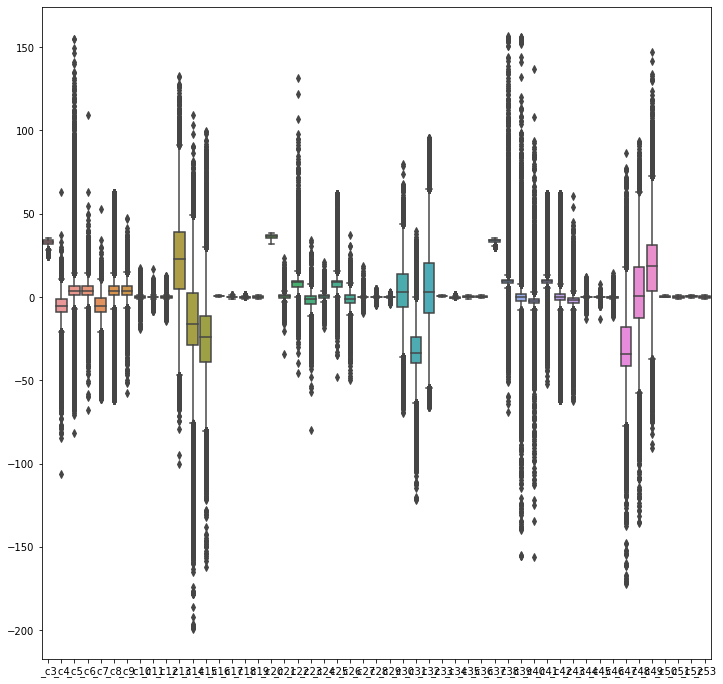

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train_pdf = train_df.toPandas()
fig, ax = plt.subplots(figsize=(12,12))
Features = train_pdf.drop(['_c1'], axis = 1)
sns.boxplot(data = Features)

### ***Delete outliers***

In [ ]:
from scipy.stats.mstats import winsorize

# Define winsorising function
def winsorising (Data, L):
  
  winsorized_dataset = winsorize(Data, limits=L)
  return winsorized_dataset

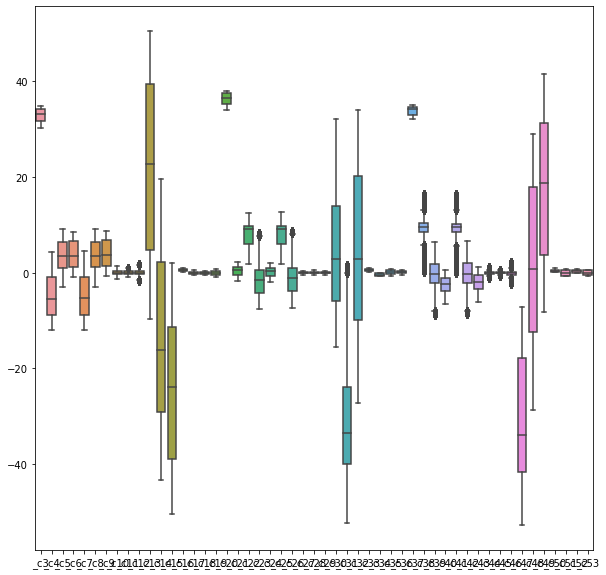

In [ ]:
# Remove outliers of columns
for c in Features.columns.values:
  limited_bound_data = winsorising(Features[c], 0.09)
  Features[c] = limited_bound_data

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data = Features)

In [ ]:
train_pdf[train_pdf.columns.values[1:]] = Features
train_df=spark.createDataFrame(train_pdf)

In [ ]:
Features=train_df.columns[1:]
output = train_df.columns[0]

### ***Logistic Regression***

In [ ]:
lr_cv_model = Logestic_Regression_pipeline(train_df, Features, output)

In [ ]:
for i, avg_accuracy in enumerate(lr_cv_model.avgMetrics):
    print("Avg. Accuracy computed across k-fold cross validation for model setting #{:d}: {:.2f}".format(i+1, avg_accuracy))

Avg. Accuracy computed across k-fold cross validation for model setting #1: 0.78
Avg. Accuracy computed across k-fold cross validation for model setting #2: 0.79
Avg. Accuracy computed across k-fold cross validation for model setting #3: 0.80


In [ ]:
print(" Best model according to k-fold cross validation: MaxIter = ",lr_cv_model.bestModel.stages[-1]._java_obj.getMaxIter())

 Best model according to k-fold cross validation: MaxIter =  20


In [ ]:
print(lr_cv_model.bestModel.stages[-1])

LogisticRegressionModel: uid=LogisticRegression_09da2a0a0dcd, numClasses=12, numFeatures=51


In [ ]:
# Make predictions on the test set 
lr_predictions = lr_cv_model.transform(test_df)
print("Evalution metrics for best model feeding with Test Set")
evaluate_model(lr_predictions)

Evalution metrics for best model feeding with Test Set
Accuracy is:  0.77
Weighted Fscore is:  0.76
Weighted Recall is:  0.77
Weighted Precision is:  0.76
